Want to know what a QAOA circuit comprises of in terms of basis gates for ibm_brisbane. This will allow be the build up an expected error profile from the error liklihood of each component

C:\Users\rafew\AppData\Local\Temp\ipykernel_14784\3884356921.py:10: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


     ┌────────────────────────────┐
q_0: ┤0                           ├
     │  QAOA(γ[0],β[0],γ[1],β[1]) │
q_1: ┤1                           ├
     └────────────────────────────┘


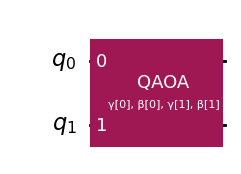

In [1]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Sampler
from qiskit.circuit import QuantumCircuit

# Define a simple cost Hamiltonian (MaxCut example)
hamiltonian = SparsePauliOp.from_list([("ZZ", 1.0), ("IZ", -0.5), ("ZI", -0.5)])

# Define QAOA instance with depth p=1
sampler = Sampler()
qaoa = QAOAAnsatz(cost_operator=hamiltonian, reps=2)

# Get the ansatz circuit
print(qaoa)  # Print the circuit
qaoa.draw("mpl")  # Visualize the decomposed circuit


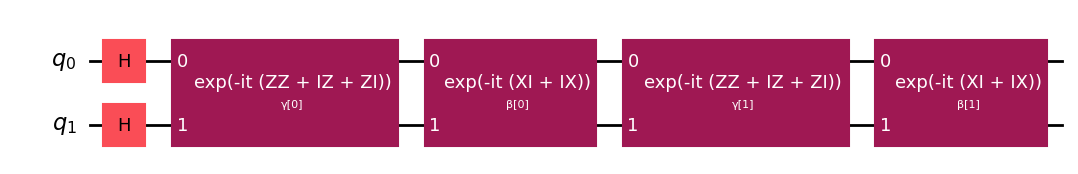

In [2]:
qaoa.decompose().draw("mpl")  # Visualize the decomposed circuit


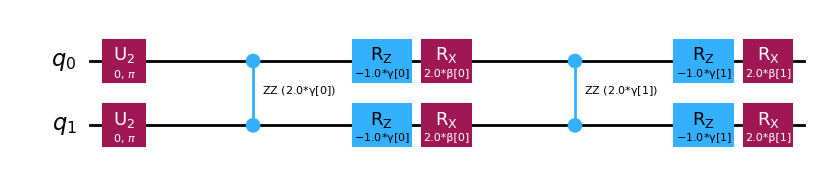

In [3]:
qaoa.decompose().decompose().draw("mpl")  # Visualize the decomposed circuit


In [ ]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Transpile for a generic IBM backend (adjust as needed)
backend_name = "ibm_brisbane"
service = QiskitRuntimeService(channel="ibm_quantum",
                                token="0156ceeea246c36a6d8709ede062eb539a013399bee42bfcf3c06794a37ae931b088295b383df9d16c3fadc5075ed80dfb5bb8c74af06524a5adfd7762705795")
backend = service.backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled_list = pm.run([qaoa])


In [ ]:
qc_transpiled_list[0].draw("mpl")

<IBMBackend('ibm_brisbane')>

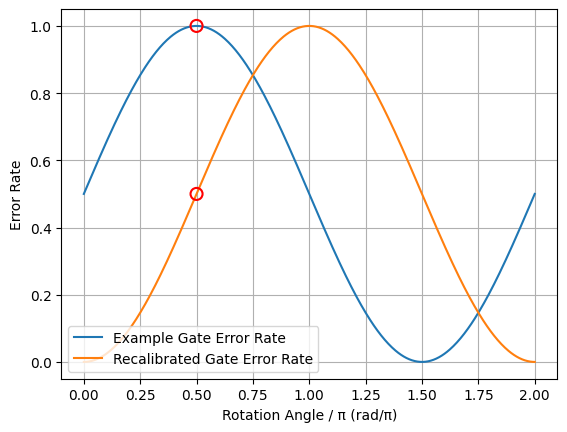

In [14]:
import numpy as np

import matplotlib.pyplot as plt

# Define the range and calculate sine waves
x = np.linspace(0, 2 * np.pi, 500)
y1 = (np.sin(x) + 1) / 2  # Normalize to range (0, 1)
y2 = (np.sin(x - np.pi / 2) + 1) / 2  # 90-degree offset, normalized

# Plot the sine waves
plt.plot(x/np.pi, y1, label='Example Gate Error Rate')
plt.plot(x/np.pi, y2, label='Recalibrated Gate Error Rate')
plt.xlabel(r'Rotation Angle / π (rad/π)')
plt.ylabel('Error Rate')

# plot red circles for annotation later
plt.scatter(0.5, (np.sin(0.5*np.pi)+1)/2,
            edgecolors="r", facecolor="none",
            zorder=2, s=75, linewidth=1.5)
plt.scatter(0.5, (np.sin(0.5*np.pi - np.pi/2)+1)/2,
            edgecolors="r", facecolor="none",
            zorder=2, s=75, linewidth=1.5)
plt.legend()
plt.grid()
plt.show()